<a href="https://colab.research.google.com/github/dldkfma9577/githubtest/blob/main/1112%ED%94%8C%EB%A6%BD%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

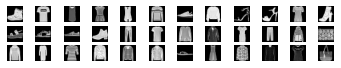

[9 0 0 3 0 2 7 2 5 5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 110)               86350     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 60)                6660      
_______________________________

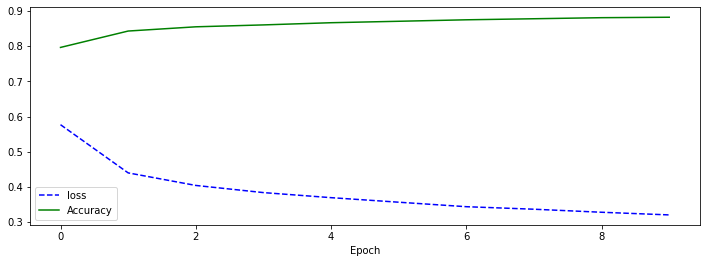

최적화 완료!

=============test result============
313/313 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8700

 Accuracy : 0.8700


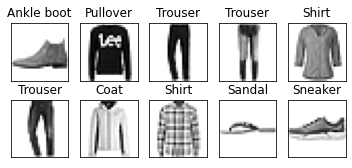

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

#MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환

(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #각 class의 label

plt.figure(figsize=(6,1))
for i in range(36): #36장만 그리기
  plt.subplot(3,12,i+1) #3행 12열 / 1부터 시작 
  plt.imshow(train_images[i],cmap='gray')
  plt.axis("off") #축은 생략
plt.show()

train_images = train_images.reshape((60000, 28*28)) #1차원으로 변경
test_images = test_images.reshape((10000,28*28)) #1차원으로 변경
train_images, test_images = train_images / 255.0,test_images/255.0 # 0-1 정규화

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels,10)
one_hot_test_labels = to_categorical(test_labels,10)

#앞의 10개 영상에 대한 one hot 인코딩 결과 확인
print(one_hot_train_labels[:10])

#층을 차례대로 쌓아 tf.kera.Sequential 모델을 만든다.
#훈련에 사용할 옵티마이저(optimizer)와 손실합수들 선택
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(input_dim=784, units=110,activation='relu'))  #1번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=60,activation='relu'))  #2번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=30,activation='relu'))  #3번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))  #출력층

#학습 과정 설정
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

#모델 요약 출력
model.summary()
#모델 학습 수행( 입력 데이터 x 입력 데이터에 대한 원앤핫 레이블)
history = model.fit(train_images, one_hot_train_labels, epochs = 10, batch_size = 30)

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행 1열 첫 번째 위치
plt.plot(history.history['loss'],'b--',label='loss') #loss 는 파란색 점선
plt.plot(history.history['accuracy'],'g-',label='Accuracy') #accuracy는 녹색 실선
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

print("\n=============test result============")
labels = model.predict(test_images)
#.evaluate()함수의 반환값 : 평가된 [0]loss, [1] accurity
print("\n Accuracy : %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

#테스트 영상 중 10개만 출력하고 예측결과를 그림위에 표시한 것
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((28,28)), cmap = plt.cm.gray_r)

plt.show()


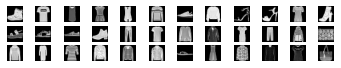

[9 0 0 3 0 2 7 2 5 5]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 110)               86350     
_________________________________________________________________
batch_normalization (BatchNo (None, 110)               440       
_________________________________________________________________
activation (Activation)      (None, 110)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6660      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60)                240       
_________________________________________________________________
activation_1 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None

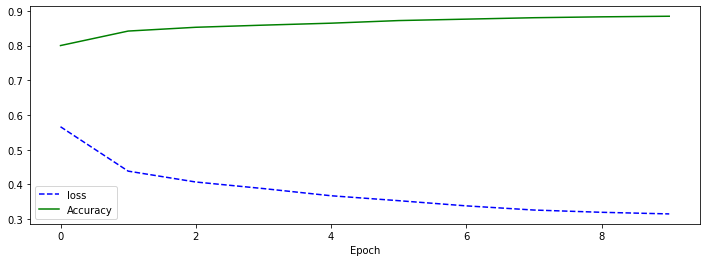

최적화 완료!

=============test result============
313/313 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8750

 Accuracy : 0.8750


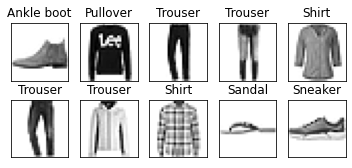

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

#MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환

(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #각 class의 label

plt.figure(figsize=(6,1))
for i in range(36): #36장만 그리기
  plt.subplot(3,12,i+1) #3행 12열 / 1부터 시작 
  plt.imshow(train_images[i],cmap='gray')
  plt.axis("off") #축은 생략
plt.show()

train_images = train_images.reshape((60000, 28*28)) #1차원으로 변경
test_images = test_images.reshape((10000,28*28)) #1차원으로 변경
train_images, test_images = train_images / 255.0,test_images/255.0 # 0-1 정규화

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

#one_hot_train_labels = to_categorical(train_labels,10)
#one_hot_test_labels = to_categorical(test_labels,10)

#앞의 10개 영상에 대한 one hot 인코딩 결과 확인
#print(one_hot_train_labels[:10])

#층을 차례대로 쌓아 tf.kera.Sequential 모델을 만든다.
#훈련에 사용할 옵티마이저(optimizer)와 손실합수들 선택
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(input_dim=784, units=110,activation='relu'))  #1번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=60,activation='relu'))  #2번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=30,activation='relu'))  #3번째 layer
#배치정규화 시행
model.add(tf.keras.layers.BatchNormalization())
#정규화된 결과값에 relu 활성화 함수 적용
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))  #출력층

#학습 과정 설정
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#모델 요약 출력
model.summary()
#모델 학습 수행( 입력 데이터 x 입력 데이터에 대한 원앤핫 레이블)
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 30)

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행 1열 첫 번째 위치
plt.plot(history.history['loss'],'b--',label='loss') #loss 는 파란색 점선
plt.plot(history.history['accuracy'],'g-',label='Accuracy') #accuracy는 녹색 실선
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

print("\n=============test result============")
labels = model.predict(test_images)
#.evaluate()함수의 반환값 : 평가된 [0]loss, [1] accurity
print("\n Accuracy : %.4f" % (model.evaluate(test_images, test_labels)[1]))

#테스트 영상 중 10개만 출력하고 예측결과를 그림위에 표시한 것
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((28,28)), cmap = plt.cm.gray_r)

plt.show()


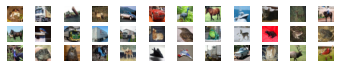

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
con

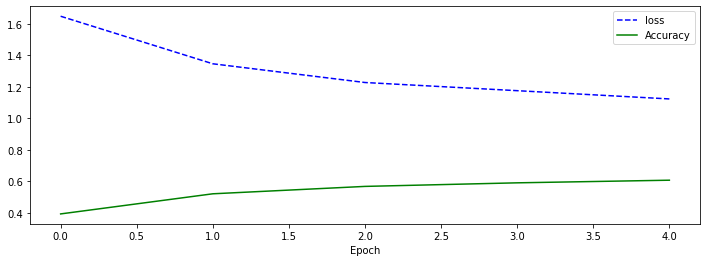

최적화 완료!

===========test result===============
313/313 - 4s - loss: 0.9594 - accuracy: 0.6702

 Accuracy: 0.6702


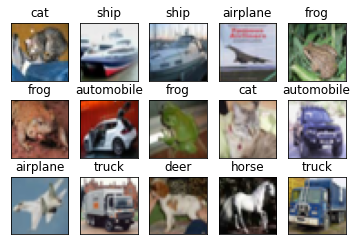

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수를 변화
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

#각 class의 label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6,1))
for i in range(36): #36장만 그리기
  plt.subplot(3,12,i+1) #3행 12열 / 1부터 시작 
  plt.imshow(train_images[i],cmap='gray')
  plt.axis("off") #축은 생략
plt.show()


#32x32차원의 벡터가 50000개 채널은 3개
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images/255.0, test_images / 255.0

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

# 모델 구성 - 네트워크 구조 표로 보는 것
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=(1,1), input_shape=(32,32,3))) # Convolution layer 3x3x32 필터 / 커널 수 : 32
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25)) #dropout
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) #Convolution layer 3x3x64 필터
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25)) #dropout
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu')) #Convolution layer 3x3x128 필터
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25)) #dropout
model.add(tf.keras.layers.Flatten()) #1차원으로 변경
model.add(tf.keras.layers.Dense(64, activation='relu')) #fc layer
model.add(tf.keras.layers.Dropout(0.25)) #dropout
model.add(tf.keras.layers.Dense(10, activation='softmax')) #fc layer

#학습 과정
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 요약 출력
model.summary()

#모델 학습
#validation 추가
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 10)

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행 1열의 첫번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

#모델 평가 및 결과 출력
print('\n===========test result===============')
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,
                                            test_labels, verbose=2)[1]))

#테스트 영상 중 10개만 출력하고 예측결과를 그림위에 표시한 것
fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32,32,3)), cmap = plt.cm.gray_r)

plt.show()

print("===========================")